In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

# Data exploration

In [2]:
train = pd.read_csv('./datasets/train.csv')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null datetime64[ns]
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [26]:
train['date'] = pd.to_datetime(train['date'])

In [4]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
train['store'].value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64

*We have 10 stores with same amount of entries*

In [9]:
min(train['date'])

'2013-01-01'

In [10]:
max(train['date'])

'2017-12-31'

*Sales data goes from 2013-01-01 to 2017-12-31*

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [63]:
train[train['store']==1].head(10)

,date,store,item,sales,date_month
0,2013-01-01,1,1,13,2013-01-01
1,2013-01-02,1,1,11,2013-01-01
2,2013-01-03,1,1,14,2013-01-01
3,2013-01-04,1,1,13,2013-01-01
4,2013-01-05,1,1,10,2013-01-01
5,2013-01-06,1,1,12,2013-01-01
6,2013-01-07,1,1,10,2013-01-01
7,2013-01-08,1,1,9,2013-01-01
8,2013-01-09,1,1,12,2013-01-01
9,2013-01-10,1,1,9,2013-01-01


## Amount of sales per store

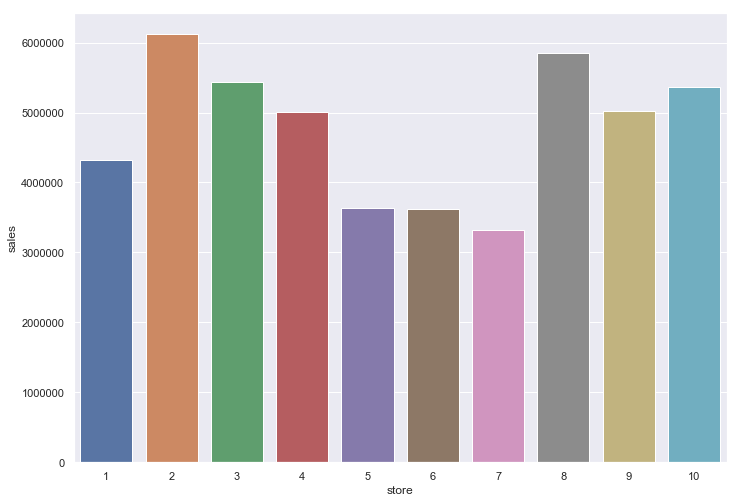

In [58]:
sns.barplot(x="store", y="sales", data=train.groupby(['store']).agg({'sales': 'sum'}).reset_index())

*The stores don't have the same amount of sales each*

In [24]:
train.groupby(['store','date']).agg({'sales': 'sum'}).reset_index().head()

,store,date,sales
0,1,2013-01-01,1316
1,1,2013-01-02,1264
2,1,2013-01-03,1305
3,1,2013-01-04,1452
4,1,2013-01-05,1499


## Monthly sales 

In [45]:
train['date_month'] = train['date'].apply(lambda x: x.replace(day=1))

In [54]:
sales_by_month = train.groupby(['store','date_month']).agg({'sales': 'sum'}).reset_index()
sales_by_month['date_month'] = pd.to_datetime(sales_by_month['date_month'])

In [57]:
sales_by_month.head()

,store,date_month,sales
0,1,2013-01-01,41077
1,1,2013-02-01,41306
2,1,2013-03-01,55827
3,1,2013-04-01,61523
4,1,2013-05-01,69272


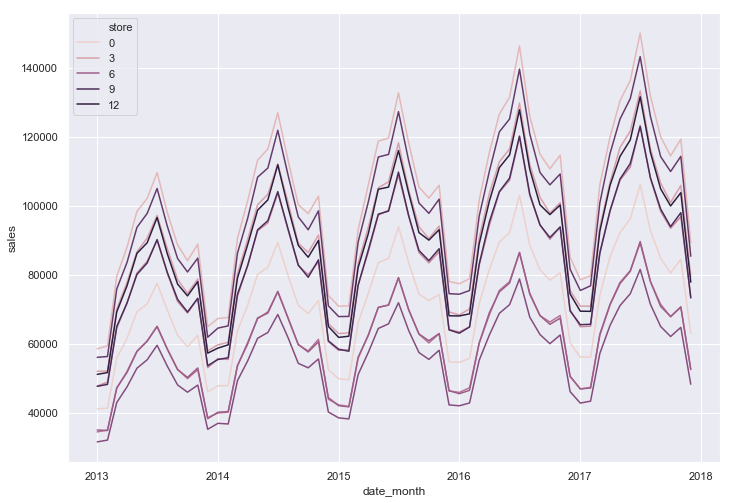

In [61]:
sns.lineplot(x="date_month", y="sales", hue='store', data=sales_by_month)

*We can clearly see a seasonality effect. We can also observe the same trend in all of the stores..*

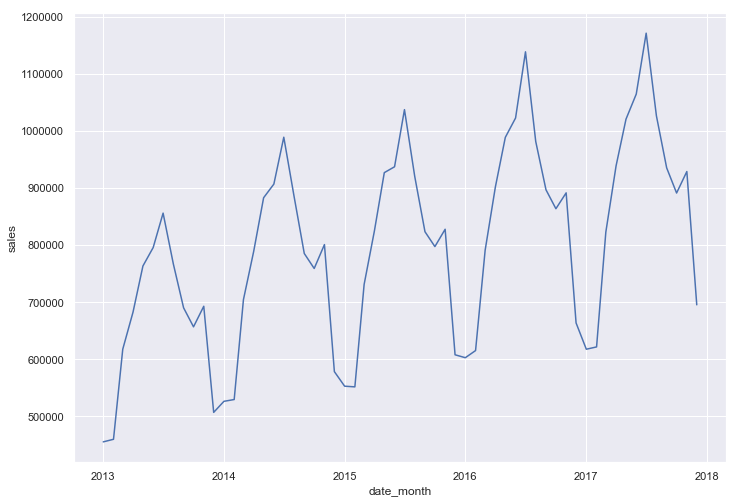

In [71]:
sns.lineplot(x="date_month", y="sales", data=sales_by_month.groupby(['date_month']).agg({'sales': 'sum'}).reset_index())

*.. So naturally, the total sales follows the same trend! Moreover, there seems to be a trend for sales going up over the years. Let's confirm these observations by using the **statsmodels** library*

In [98]:
sales_month_ts = sales_by_month.groupby(['date_month']).agg({'sales': 'sum'}).reset_index()
sales_month_ts.index = sales_month_ts['date_month']
sales_month_ts.drop(columns=['date_month'], inplace=True)

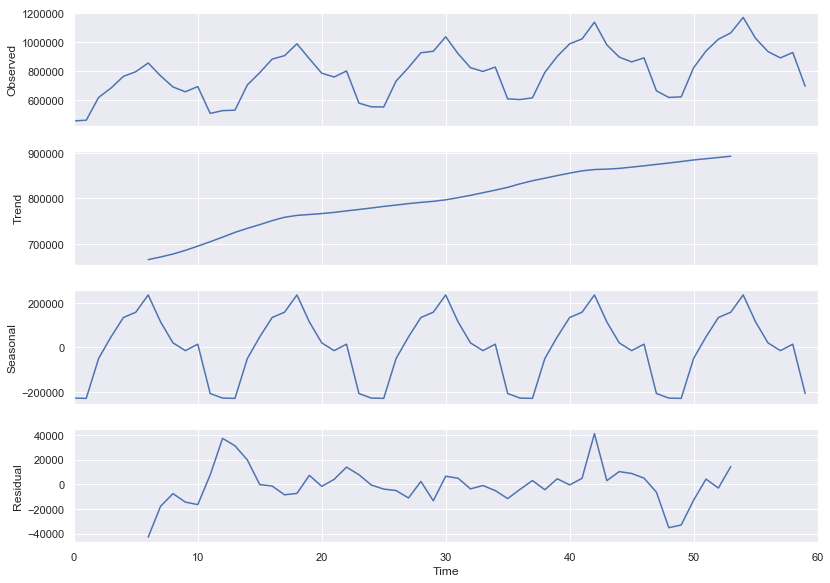

In [116]:
res = sm.tsa.seasonal_decompose(sales_month_ts.values,freq=12,model="additive")
fig = res.plot()